# Smart Symptom Classifier

**Objective:** Train a machine learning model to classify diseases based on symptoms using a public dataset. This notebook handles preprocessing, binary symptom encoding, model training, and evaluation.

I made a website to display a demo of my findings, I have my EDA on display there.

**HERE ARE THE LINKS**

[![Streamlit App](https://img.shields.io/badge/Live%20Demo-Streamlit-ff4b4b?logo=streamlit&logoColor=white)](https://smart-symptom-classifier-demo.streamlit.app)  
[![GitHub Repo](https://img.shields.io/badge/Code-GitHub-181717?logo=github)](https://github.com/sarahlamond/smart-symptom-classifier/tree/main?tab=readme-ov-file)

*It will be awesome if you guys support! :)*

In [13]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Data Preprocessing & Feature Engineering

df = pd.read_csv('dataset/dataset.csv')
print(len(df))
print('--'*10)
print(df.isna().sum())

symptom_cols = [col for col in df.columns if col.lower().startswith("symptom")]

all_symptoms = sorted(set(
    s.strip().replace(" ", "_").lower()
    for col in symptom_cols
    for s in df[col].dropna().unique()
))

for symptom in all_symptoms:
    df[symptom] = df[symptom_cols].apply(
        lambda row: int(symptom in [str(x).strip().replace(" ", "_").lower() for x in row if pd.notna(x)]),
        axis=1
    )

X = df[all_symptoms]
y = df["Disease"]

joblib.dump(all_symptoms, "output/all_symptoms.pkl")

4920
--------------------
Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64


['output/all_symptoms.pkl']

In [15]:
# Model Building

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

joblib.dump(model, "output/model.pkl")

joblib.dump(list(model.classes_), "output/classes_name.pkl")

y_pred_rf = model.predict(X_test)
acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc:.2f}\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred_rf, target_names=model.classes_))

Random Forest Accuracy: 1.00

Classification Report:

                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        30
                                   AIDS       1.00      1.00      1.00        30
                                   Acne       1.00      1.00      1.00        30
                    Alcoholic hepatitis       1.00      1.00      1.00        30
                                Allergy       1.00      1.00      1.00        30
                              Arthritis       1.00      1.00      1.00        30
                       Bronchial Asthma       1.00      1.00      1.00        30
                   Cervical spondylosis       1.00      1.00      1.00        30
                            Chicken pox       1.00      1.00      1.00        30
                    Chronic cholestasis       1.00      1.00      1.00        30
                            Common Cold       1.00    

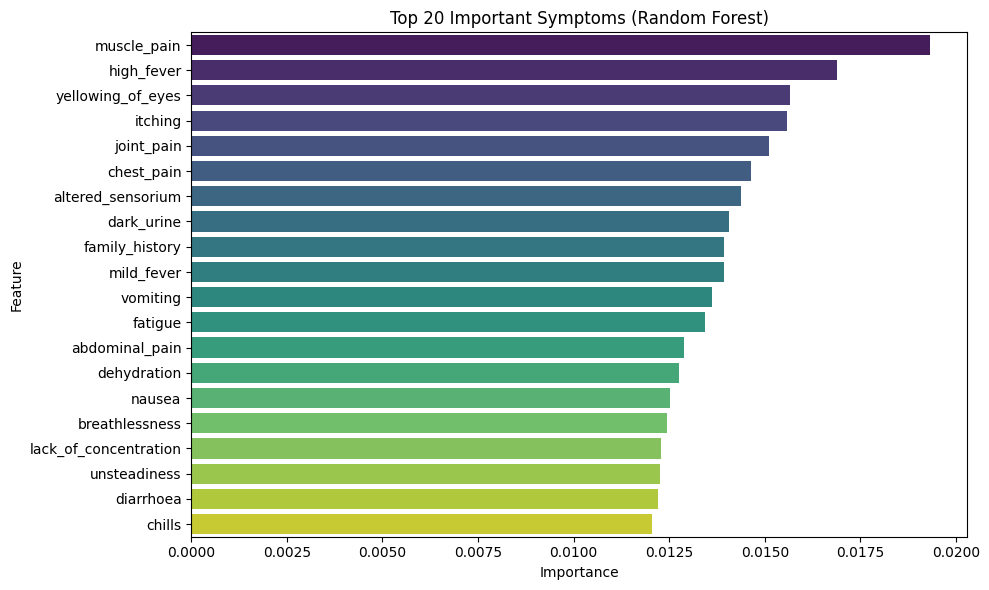

In [16]:
# Observations

importances = model.feature_importances_
feat_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feat_df = feat_df.sort_values(by="Importance", ascending=False).head(20)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_df, palette="viridis", legend=False)
plt.title("Top 20 Important Symptoms (Random Forest)")
plt.tight_layout()
plt.show()


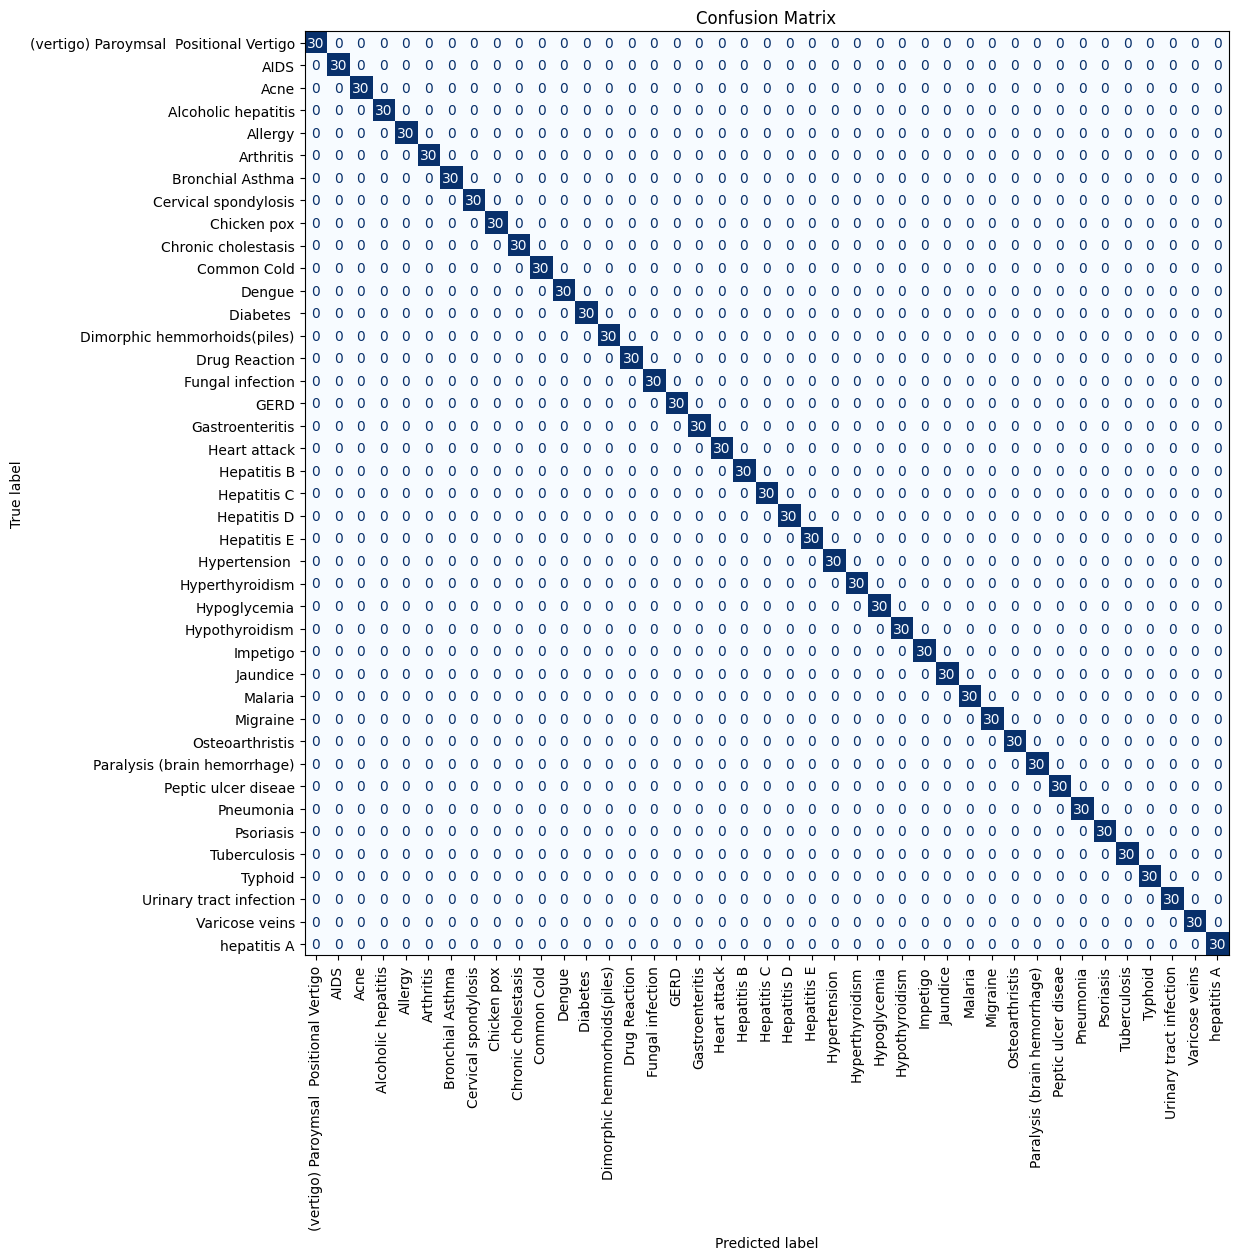

In [17]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, xticks_rotation=90, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix")
plt.show()


In [18]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))

Train Accuracy: 1.0
Test Accuracy: 1.0
